In [1]:
# Bibliotecas

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# Carregando arquivo com percurso já otimizado de visitação dos Castelos

enderecos = pd.read_excel('Trabalho OP.xlsx', sheet_name = 'Endereços', nrows = 25)
rota = pd.read_excel('Trabalho OP.xlsx', sheet_name = 'Análises', usecols = "E", nrows = 25, skiprows = lambda x: x in [0, 1])

In [3]:
enderecos

,Castelos,Endereço
0,Windsor Castle,"Castelo de Windsor, Windsor SL4 1NJ, Reino Unido"
1,Warwick Castle,"Warwick CV34 4QU, United Kingdom"
2,Tower of London,"London EC3N 4AB, United Kingdom"
3,Pembroke Castle,"Pembroke Castle, Pembroke SA71 4LA, Reino Unido"
4,Hever Castle,"Hever Rd, Hever, Edenbridge, TN8 7NG United Ki..."
5,Alnwick Castle,"Alnwick Castle, Alnwick, Northumberland NE66 1NQ"
6,Bamburgh Castle,Bamburgh Northumberland NE69 7DF
7,Leeds Castle,"Broomfield, Maidstone ME17 1PL, United Kingdom"
8,Dover Castle,"Castle Hill Rd., Dover CT16 1HU, United Kingdom"
9,Bodiam Castle,"Bodiam, Robertsbridge TN32 5UA, United Kingdom"


In [4]:
rota

,Castelos.1
0,Tower of London
1,Colchester Castle
2,Leeds Castle
3,Dover Castle
4,Bodiam Castle
5,Hever Castle
6,Arundel Castle
7,Windsor Castle
8,Warwick Castle
9,Highclere Castle


In [5]:
# Inicializando o Chrome com definição dos parâmetros

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
wd = webdriver.Chrome(r"chromedriver.exe",options=chrome_options)

In [6]:
# Limpando cookies

wd.delete_all_cookies()

In [7]:
# Abrindo Maps

wd.get("https://www.google.com.br/maps")
time.sleep(2)

In [8]:
def print_tela(link):
    try:
        figure = wd.find_element_by_xpath(link).screenshot_as_png
        im = Image.open(BytesIO(figure))
        plt.figure(figsize=(20,16))
        plt.imshow(im)
        plt.show()
    except Exception as e:
        print("erro no print: ", e)
        pass

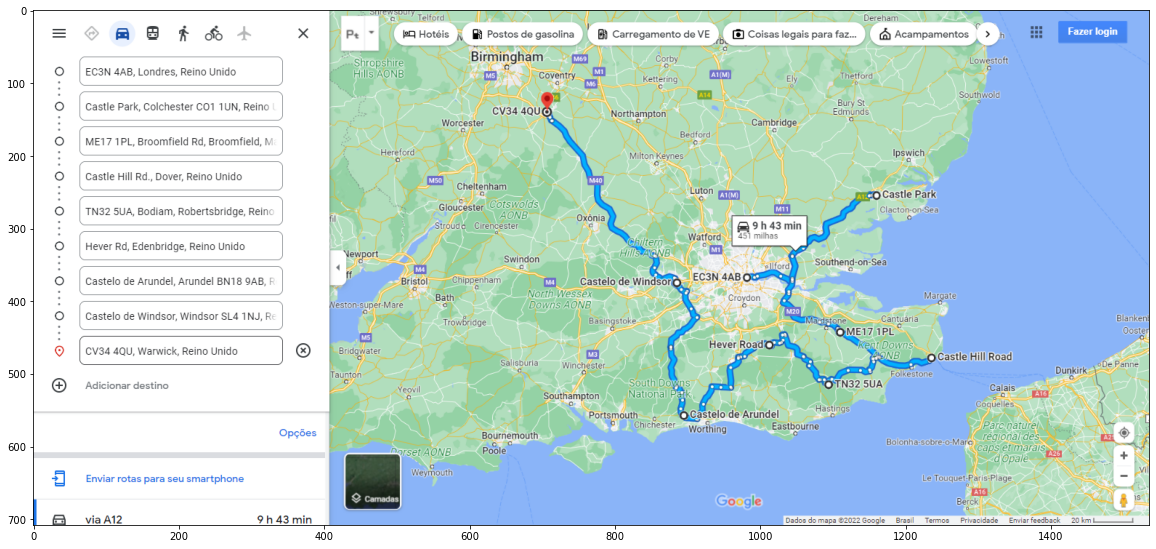

In [9]:
# Scrapping - Trecho 1:

trecho = rota['   Castelos.1']
# Clica no botão de rota
botaoRota = wd.find_element_by_xpath('//*[@id="hArJGc"]/div')
botaoRota.click()
time.sleep(2)

for i in range(0,2):
  # Preenche endereço inicial
  try:
    castelo = wd.find_element_by_xpath('//*[@id="sb_ifc50"]/input')
    castelo.clear()
    castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[0]]).index[0]])
    castelo.send_keys(Keys.ENTER)
    time.sleep(2)
    erro = None
  except Exception as e:
    erro = str(e)
    print(0, trecho[0])

  if erro:
    time.sleep(2)
  else:
    break

for x in range(1, 9):
  for i in range(0,2):
    try:
      castelo = wd.find_element_by_xpath('//*[@id="sb_ifc' + str(50 + x) + '"]/input')
      castelo.clear()
      castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[x]]).index[0]])
      castelo.send_keys(Keys.ENTER)
      time.sleep(3)
      erro = None
    except Exception as e:
      erro = str(e)
      print(x, trecho[x])

    if erro:
      time.sleep(2)
    else:
      break

  if x < 8:
    for i in range(0,2):
      try:
        # Clica no botão de adicionar destino
        botaoAdicionaRota = wd.find_element_by_xpath('//*[@id="omnibox-directions"]/div/div[3]/button/div[2]/span')
        botaoAdicionaRota.click()
        time.sleep(3)
        erro = None
      except Exception as e:
        erro = str(e)
        print("Erro ao adicionar rota no percurso: ", trecho[x])

      if erro:
        time.sleep(2)
      else:
        break

print_tela('//*[@id="content-container"]')

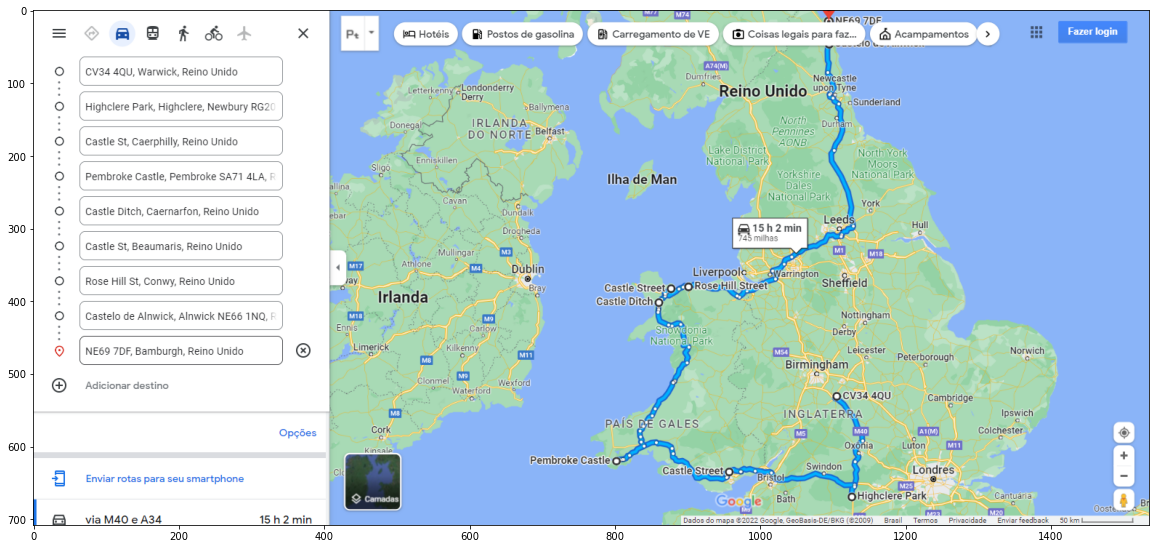

In [10]:
# Scrapping - Trecho 2:

wd.get("https://www.google.com.br/maps")
time.sleep(2)

# Clica no botão de rota
botaoRota = wd.find_element_by_xpath('//*[@id="hArJGc"]/div')
botaoRota.click()
time.sleep(2)

for i in range(0,2):
  # Preenche endereço inicial
  try:
    castelo = wd.find_element_by_xpath('//*[@id="sb_ifc50"]/input')
    castelo.clear()
    castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[8]]).index[0]])
    castelo.send_keys(Keys.ENTER)
    time.sleep(3)
    erro = None
  except Exception as e:
    erro = str(e)
    print(8, trecho[8])

  if erro:
    time.sleep(2)
  else:
    break

for x in range(9, 17):
  for i in range(0,2):
    try:
      castelo = wd.find_element_by_xpath('//*[@id="sb_ifc' + str(42 + x) + '"]/input')
      castelo.clear()
      castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[x]]).index[0]])
      castelo.send_keys(Keys.ENTER)
      time.sleep(3)
      erro = None
    except Exception as e:
      erro = str(e)
      print(x, trecho[x])

    if erro:
      time.sleep(2)
    else:
      break

  if x < 16:
    for i in range(0,2):
      try:
        # Clica no botão de adicionar destino
        botaoAdicionaRota = wd.find_element_by_xpath('//*[@id="omnibox-directions"]/div/div[3]/button/div[2]/span')
        botaoAdicionaRota.click()
        time.sleep(2)
        erro = None
      except Exception as e:
        erro = str(e)
        print("Erro ao adicionar rota no percurso: ", trecho[x])

      if erro:
        time.sleep(2)
      else:
        break

print_tela('//*[@id="content-container"]')

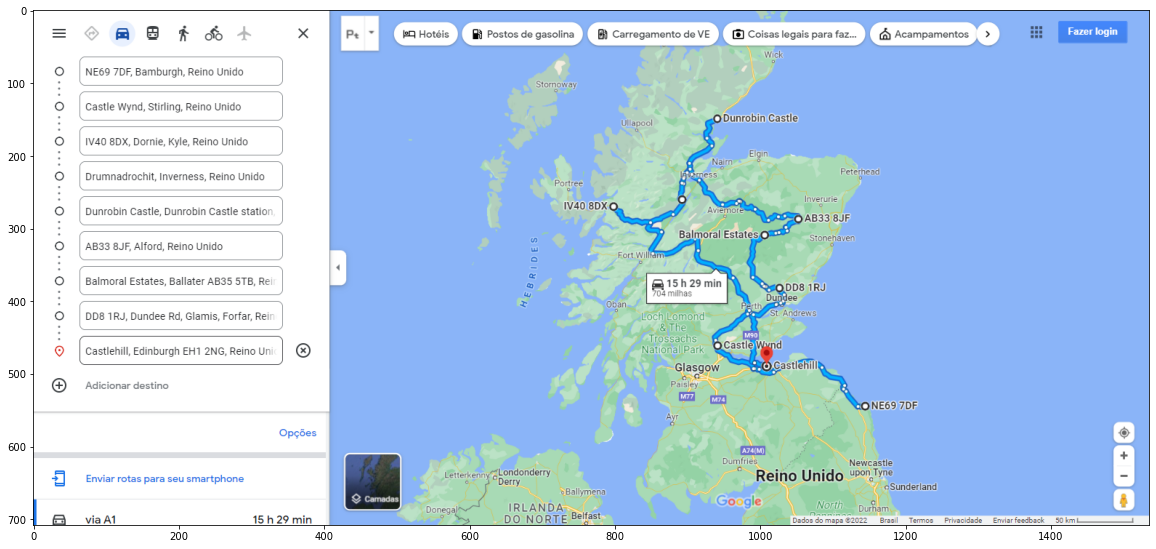

In [11]:
# Scrapping - Trecho 3:

wd.get("https://www.google.com.br/maps")
time.sleep(2)

# Clica no botão de rota
botaoRota = wd.find_element_by_xpath('//*[@id="hArJGc"]/div')
botaoRota.click()
time.sleep(2)

for i in range(0,2):
  # Preenche endereço inicial
  try:
    castelo = wd.find_element_by_xpath('//*[@id="sb_ifc50"]/input')
    castelo.clear()
    castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[16]]).index[0]])
    castelo.send_keys(Keys.ENTER)
    time.sleep(3)
    erro = None
  except Exception as e:
    erro = str(e)
    print(16, trecho[16])

  if erro:
    time.sleep(2)
  else:
    break

for x in range(17, 25):
  for i in range(0,2):
    try:
      castelo = wd.find_element_by_xpath('//*[@id="sb_ifc' + str(34 + x) + '"]/input')
      castelo.clear()
      castelo.send_keys(enderecos['Endereço'][(enderecos['Endereço'][enderecos['Castelos'] == trecho[x]]).index[0]])
      castelo.send_keys(Keys.ENTER)
      time.sleep(3)
      erro = None
    except Exception as e:
      erro = str(e)
      print(x, trecho[x])
      print(str(e))

    if erro:
      time.sleep(2)
    else:
      break

  if x < 24:
    for i in range(0,2):
      try:
        # Clica no botão de adicionar destino
        botaoAdicionaRota = wd.find_element_by_xpath('//*[@id="omnibox-directions"]/div/div[3]/button/div[2]/span')
        botaoAdicionaRota.click()
        time.sleep(2)
        erro = None
      except Exception as e:
        erro = str(e)
        print("Erro ao adicionar rota no percurso: ", trecho[x])

      if erro:
        time.sleep(2)
      else:
        break

print_tela('//*[@id="content-container"]')

In [12]:
# Encerra o Scrapping
wd.quit()